# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | felanitx
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | tiksi
Processing Record 6 of Set 1 | saipan
Processing Record 7 of Set 1 | edinburgh of the seven seas
Processing Record 8 of Set 1 | broken hill
Processing Record 9 of Set 1 | petropavlovsk-kamchatsky
Processing Record 10 of Set 1 | aasiaat
Processing Record 11 of Set 1 | talnakh
Processing Record 12 of Set 1 | auki
Processing Record 13 of Set 1 | atafu village
Processing Record 14 of Set 1 | adamstown
Processing Record 15 of Set 1 | fale old settlement
Processing Record 16 of Set 1 | manokwari
Processing Record 17 of Set 1 | flying fish cove
Processing Record 18 of Set 1 | kariba
Processing Record 19 of Set 1 | isafjordur
Processing Record 20 of Set 1 | nova olinda do norte
Processing Record 21 of Set 1 | blackmans bay
Process

Processing Record 36 of Set 4 | pont-a-mousson
Processing Record 37 of Set 4 | uyar
Processing Record 38 of Set 4 | gobabis
Processing Record 39 of Set 4 | akobo
Processing Record 40 of Set 4 | malanje
Processing Record 41 of Set 4 | altayskoye
Processing Record 42 of Set 4 | san mariano
Processing Record 43 of Set 4 | bodo
Processing Record 44 of Set 4 | tosontsengel
Processing Record 45 of Set 4 | baruun-urt
Processing Record 46 of Set 4 | taro
Processing Record 47 of Set 4 | machali
Processing Record 48 of Set 4 | tipasa
Processing Record 49 of Set 4 | inarajan village
Processing Record 0 of Set 5 | dalai
Processing Record 1 of Set 5 | vadso
Processing Record 2 of Set 5 | uglegorsk
Processing Record 3 of Set 5 | velikiy novgorod
Processing Record 4 of Set 5 | amla
Processing Record 5 of Set 5 | mount pearl
Processing Record 6 of Set 5 | igrim
Processing Record 7 of Set 5 | pisco
Processing Record 8 of Set 5 | tinogasta
Processing Record 9 of Set 5 | minas de marcona
Processing Recor

Processing Record 30 of Set 8 | gadzhiyevo
Processing Record 31 of Set 8 | choibalsan
Processing Record 32 of Set 8 | el alto
Processing Record 33 of Set 8 | zabol
Processing Record 34 of Set 8 | balikpapan
Processing Record 35 of Set 8 | quellon
Processing Record 36 of Set 8 | nikolayevsk-on-amure
Processing Record 37 of Set 8 | kone
Processing Record 38 of Set 8 | chaplynka
Processing Record 39 of Set 8 | nogliki
Processing Record 40 of Set 8 | kuqa
Processing Record 41 of Set 8 | ridgecrest
Processing Record 42 of Set 8 | omdurman
Processing Record 43 of Set 8 | pucon
Processing Record 44 of Set 8 | coesfeld
Processing Record 45 of Set 8 | oamaru
Processing Record 46 of Set 8 | bonnyville
Processing Record 47 of Set 8 | vetlanda
Processing Record 48 of Set 8 | homer
Processing Record 49 of Set 8 | shingu
Processing Record 0 of Set 9 | jeju city
Processing Record 1 of Set 9 | saint-francois
Processing Record 2 of Set 9 | sandnessjoen
Processing Record 3 of Set 9 | tselinnoye
Processi

Processing Record 18 of Set 12 | aberdeen
Processing Record 19 of Set 12 | can tho
Processing Record 20 of Set 12 | ballina
Processing Record 21 of Set 12 | ibshaway
Processing Record 22 of Set 12 | angaur state
Processing Record 23 of Set 12 | caleta de carquin
Processing Record 24 of Set 12 | vylkove
Processing Record 25 of Set 12 | baoshan
Processing Record 26 of Set 12 | nea alikarnassos
Processing Record 27 of Set 12 | sarykemer
Processing Record 28 of Set 12 | cocal
Processing Record 29 of Set 12 | gonzales
Processing Record 30 of Set 12 | sonsorol village
City not found. Skipping...
Processing Record 31 of Set 12 | ha'il
Processing Record 32 of Set 12 | n'zeto
Processing Record 33 of Set 12 | pendleton
Processing Record 34 of Set 12 | lashkar gah
Processing Record 35 of Set 12 | rawson
Processing Record 36 of Set 12 | pierre
Processing Record 37 of Set 12 | acajutla
Processing Record 38 of Set 12 | topolobampo
Processing Record 39 of Set 12 | nuuk
Processing Record 40 of Set 12 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0           waitangi -43.9535 -176.5597     14.34        95         100   
1           felanitx  39.4696    3.1483     13.29        64         100   
2         bredasdorp -34.5322   20.0403     18.34        82         100   
3  port-aux-francais -49.3500   70.2167      5.20        90         100   
4              tiksi  71.6872  128.8694    -28.65        98          99   

   Wind Speed Country        Date  
0        2.24      NZ  1711482336  
1        8.34      ES  1711482336  
2        5.57      ZA  1711482337  
3       15.29      TF  1711482338  
4        3.56      RU  1711482338

In [15]:
# Export the City_Data into a csv
city_data_df.to_csv("/Users/Joyjo/OneDrive/Documents/GitHub/python-api-challenge/output_data, index_label=City_ID")

In [16]:
# Read saved data
city_data_df = pd.read_csv("/Users/Joyjo/OneDrive/Documents/GitHub/python-api-challenge/output_data, index_label=City_ID")

# Display sample data
city_data_df.head()

Unnamed: 0               City      Lat       Lng  Max Temp  Humidity  \
0           0           waitangi -43.9535 -176.5597     14.34        95   
1           1           felanitx  39.4696    3.1483     13.29        64   
2           2         bredasdorp -34.5322   20.0403     18.34        82   
3           3  port-aux-francais -49.3500   70.2167      5.20        90   
4           4              tiksi  71.6872  128.8694    -28.65        98   

   Cloudiness  Wind Speed Country        Date  
0         100        2.24      NZ  1711482336  
1         100        8.34      ES  1711482336  
2         100        5.57      ZA  1711482337  
3         100       15.29      TF  1711482338  
4          99        3.56      RU  1711482338

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

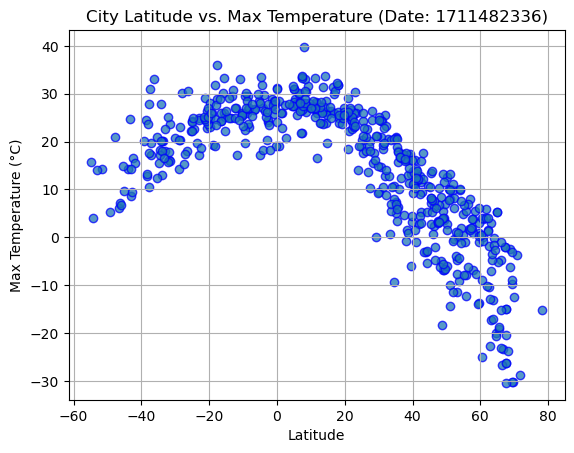

In [18]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="blue", alpha=0.75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature (Date: {city_data_df['Date'].iloc[0]})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (째C)")
plt.grid(True)

# Save the figure
plt.savefig("/Users/Joyjo/OneDrive/Documents/GitHub/python-api-challenge/output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

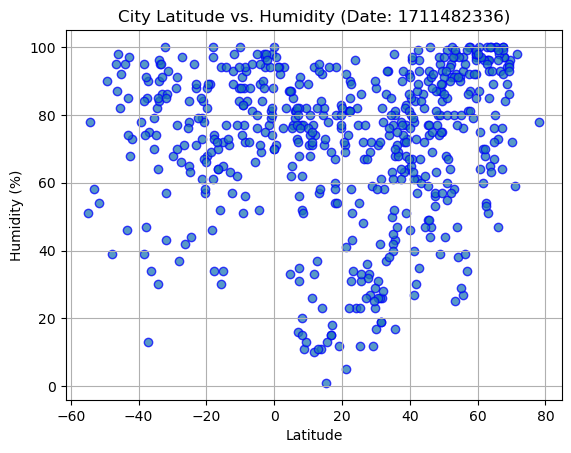

In [19]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="blue", alpha=0.75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity (Date: {city_data_df['Date'].iloc[0]})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("/Users/Joyjo/OneDrive/Documents/GitHub/python-api-challenge/output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

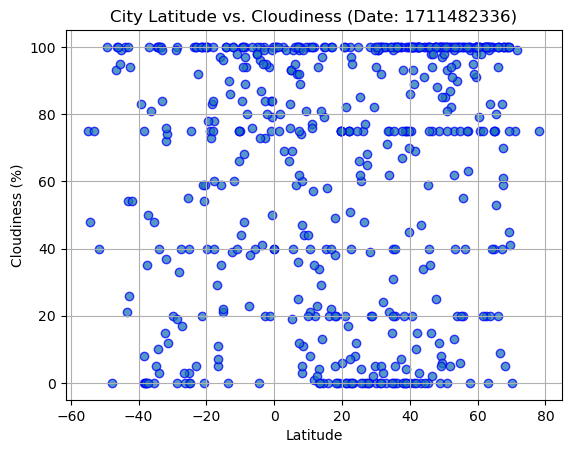

In [20]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="blue", alpha=0.75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (Date: {city_data_df['Date'].iloc[0]})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("/Users/Joyjo/OneDrive/Documents/GitHub/python-api-challenge/output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

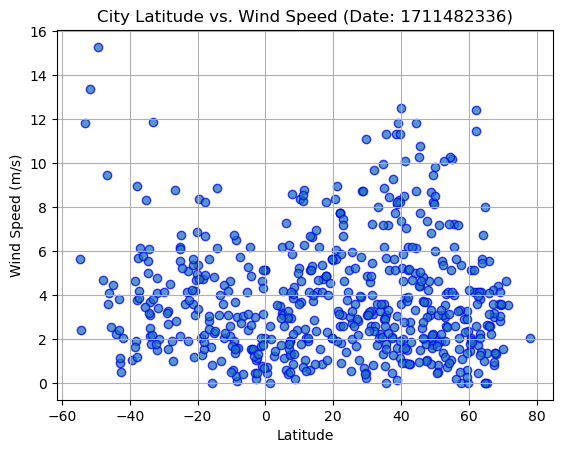

In [21]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="blue", alpha=0.75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed (Date: {city_data_df['Date'].iloc[0]})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("/Users/Joyjo/OneDrive/Documents/GitHub/python-api-challenge/output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


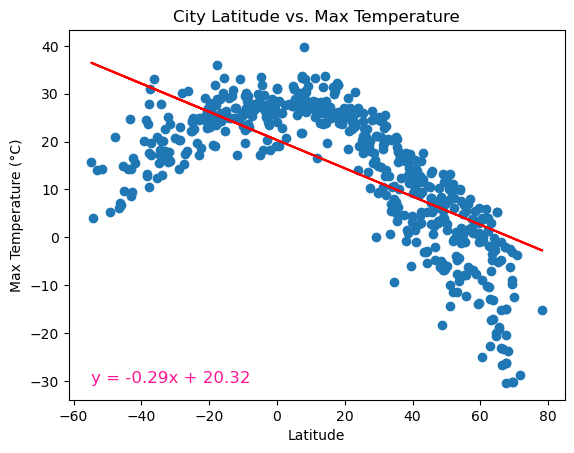

In [50]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, xlabel, ylabel, title):
    # Perform linear regression
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    
    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Plot scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Create line equation string and annotate
    line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
    plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=12, color="deeppink")
    
    # Label plot
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
    # Show plot
    plt.show()

# Call the function to plot linear regression for temperature vs. latitude
plot_linear_regression(city_data_df["Lat"], city_data_df["Max Temp"], "Latitude", "Max Temperature (째C)", "City Latitude vs. Max Temperature")

In [36]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

Unnamed: 0                      City      Lat       Lng  Max Temp  \
1           1                  felanitx  39.4696    3.1483     13.29   
4           4                     tiksi  71.6872  128.8694    -28.65   
5           5                    saipan  15.1355  145.7010     26.39   
8           8  petropavlovsk-kamchatsky  53.0452  158.6483     -4.67   
9           9                   aasiaat  68.7098  -52.8699     -6.28   

   Humidity  Cloudiness  Wind Speed Country        Date  
1        64         100        8.34      ES  1711482336  
4        98          99        3.56      RU  1711482338  
5         1          40        4.12      MP  1711482339  
8        58          75        3.00      RU  1711482341  
9        89         100        4.43      GL  1711482341

In [37]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

Unnamed: 0                         City      Lat       Lng  Max Temp  \
0           0                     waitangi -43.9535 -176.5597     14.34   
2           2                   bredasdorp -34.5322   20.0403     18.34   
3           3            port-aux-francais -49.3500   70.2167      5.20   
6           6  edinburgh of the seven seas -37.0676  -12.3116     17.26   
7           7                  broken hill -31.9500  141.4333     16.06   

   Humidity  Cloudiness  Wind Speed Country        Date  
0        95         100        2.24      NZ  1711482336  
2        82         100        5.57      ZA  1711482337  
3        90         100       15.29      TF  1711482338  
6        75         100        6.12      SH  1711482339  
7        43          72        4.77      AU  1711482340

###  Temperature vs. Latitude Linear Regression Plot

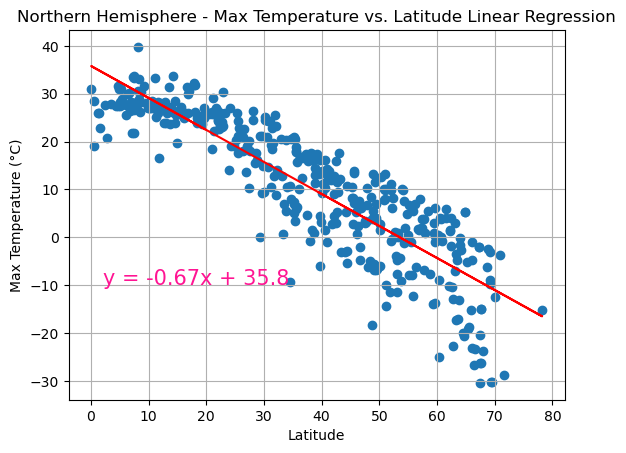

In [49]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (2, -10), fontsize=15, color="deeppink")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (째C)")  # Adjust ylabel based on the weather variable you are analyzing
plt.title("Northern Hemisphere - Max Temperature vs. Latitude Linear Regression")
plt.grid(True)
plt.show()

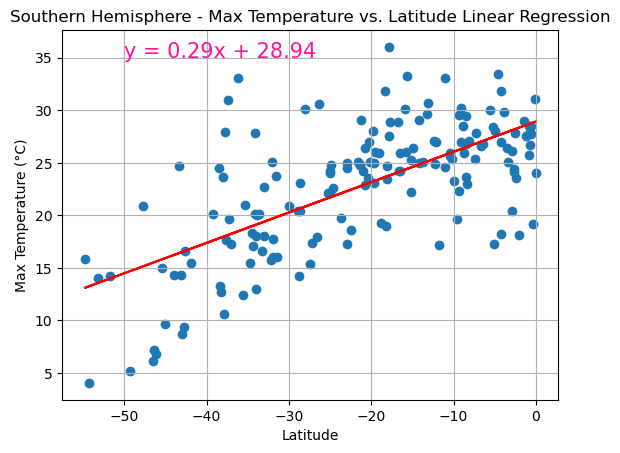

In [55]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]  

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-50, 35), fontsize=15, color="deeppink")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (째C)") 
plt.title("Southern Hemisphere - Max Temperature vs. Latitude Linear Regression")
plt.grid(True)
plt.show()

**Discussion about the linear relationship:** the linear regression help shows the prediction of temperatures and how it variesw for each i notice that the southern hemisphere is positive and northern is negative maybe this correlates to seasons.

### Humidity vs. Latitude Linear Regression Plot

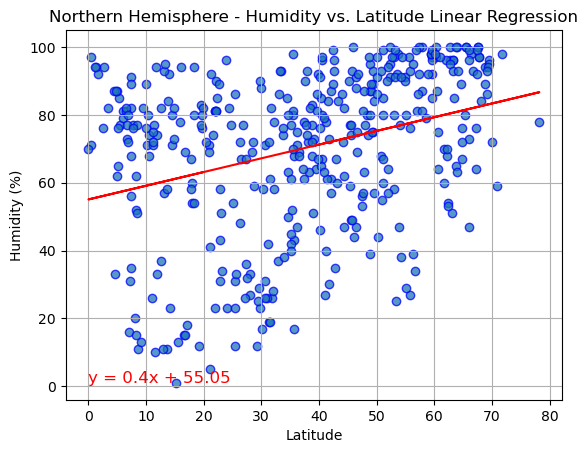

In [56]:
# Northern Hemisphere
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Plot scatter plot
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], edgecolors="blue", alpha=0.75)

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
regress_values = northern_hemi_df["Lat"] * slope + intercept

# Plot regression line
plt.plot(northern_hemi_df["Lat"], regress_values, "r-")

# Annotate
plt.annotate(f'y = {round(slope, 2)}x + {round(intercept, 2)}', (min(northern_hemi_df["Lat"]), min(northern_hemi_df["Humidity"])), fontsize=12, color="red")

# Plot
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Show plot
plt.show()

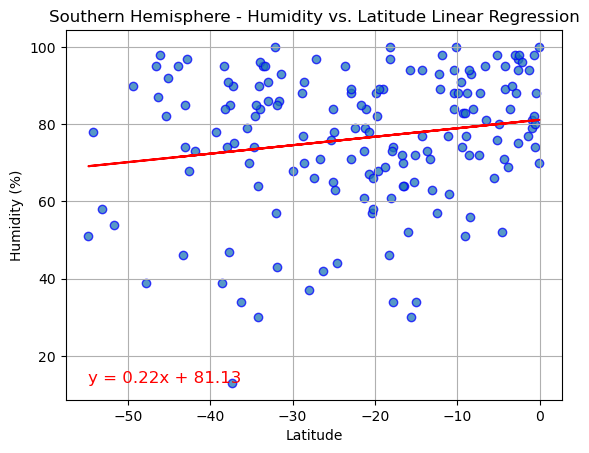

In [57]:
# Southern Hemisphere
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Plot scatter plot
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], edgecolors="blue", alpha=0.75)

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
regress_values = southern_hemi_df["Lat"] * slope + intercept

# Plot regression line
plt.plot(southern_hemi_df["Lat"], regress_values, "r-")

# Annotate
plt.annotate(f'y = {round(slope, 2)}x + {round(intercept, 2)}', (min(southern_hemi_df["Lat"]), min(southern_hemi_df["Humidity"])), fontsize=12, color="red")

# Add labels and title
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Show plot
plt.show()

**Discussion about the linear relationship:** it does not look like humididy has much correlation with lat, humitdity is higher in southern hempisphere

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.19908378186425713


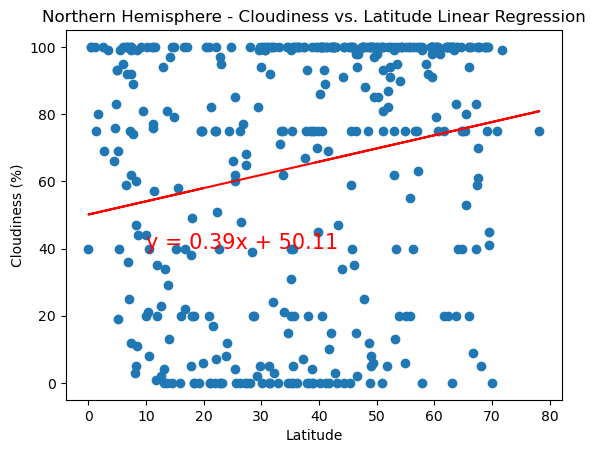

In [58]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

# Get regression values
regress_values = northern_hemi_df["Lat"] * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

# Plot regression line
plt.plot(northern_hemi_df["Lat"], regress_values, "r-")

# Annotate
plt.annotate(line_eq, (10,40), fontsize=15, color="red")

# Label plot
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")

# Print r-value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()

The r-value is: 0.1973856605117335


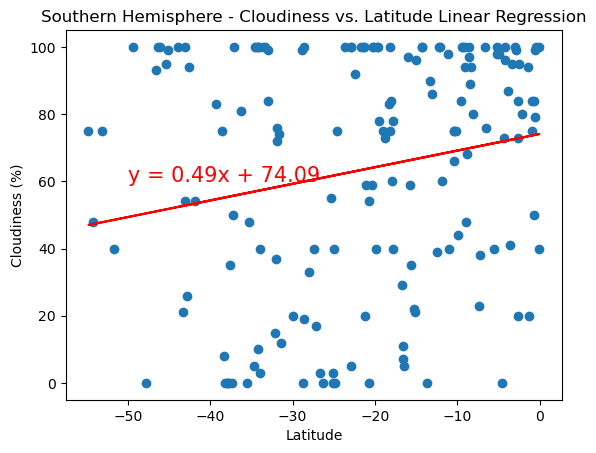

In [59]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

# Get regression values
regress_values = southern_hemi_df["Lat"] * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

# Plot regression line
plt.plot(southern_hemi_df["Lat"], regress_values, "r-")

# Annotate
plt.annotate(line_eq, (-50,60), fontsize=15, color="red")

# Label plot
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")

# Print r-value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()

**Discussion about the linear relationship:** shows no valuable correleation

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.01935964318144269


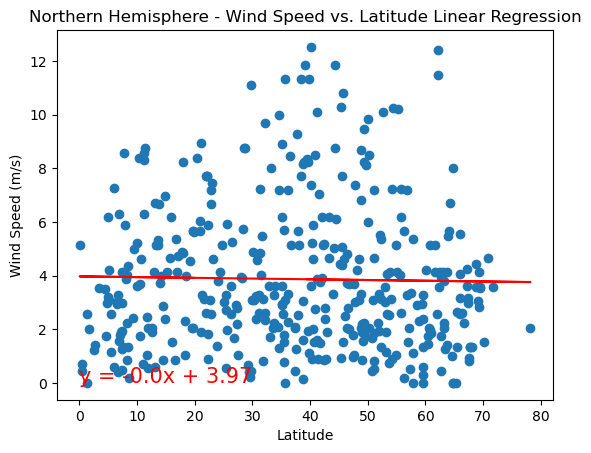

In [62]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create equation of the line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")

# Annotate
plt.annotate(line_eq,(0,0),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')

# Print r-value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()

The r-value is: -0.32934764492468094


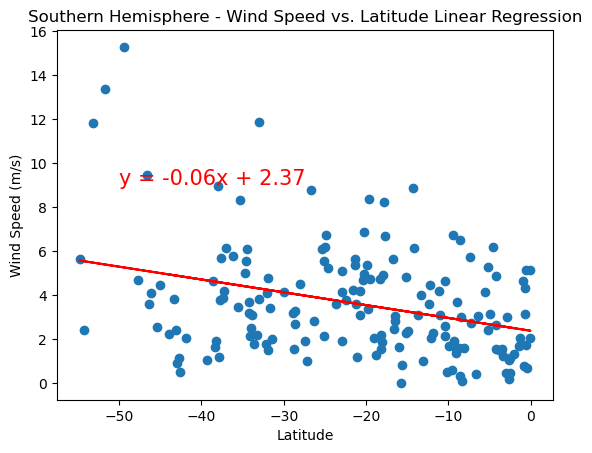

In [60]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create equation of the line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")

# Annotate
plt.annotate(line_eq,(-50,9),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')

# Print r-value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
#no close relation except southern when you enge closer to 0 lat 